In [1]:
# # https://www.properati.com.ar/data
# ! wget -O ar_properties.csv.gz -q https://storage.googleapis.com/properati-data-public/ar_properties.csv.gz
# ! gzip -d -f /content/ar_properties.csv.gz

In [2]:
import pandas as pd
import numpy as np

import sklearn as sk
from sklearn import model_selection
from sklearn import ensemble
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns

# Lectura de datos

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# ! gzip -d -f /content/drive/MyDrive/ar_properties.csv.gz

In [5]:
df = pd.read_csv('/content/drive/MyDrive/ar_properties.csv', index_col="id")  

In [6]:
df.head()

,ad_type,start_date,end_date,created_on,lat,lon,l1,l2,l3,l4,...,bathrooms,surface_total,surface_covered,price,currency,price_period,title,description,property_type,operation_type
id,,,,,,,,,,,,,,,,,,,,,
DyVXfkpKygVBKuUk5olH+A==,Propiedad,2020-08-22,2020-09-03,2020-08-22,-34.407468,-58.957367,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,NaN,...,NaN,133139.0,NaN,NaN,NaN,Mensual,VENTA - Lote Industrial 130.000m2 - Parque Ind...,Lote (Nro.50) mide 133.139 m2\n<br>Valor: U$S ...,Lote,Venta
9naojilaMecJN4jlQiTkGg==,Propiedad,2020-08-22,2020-09-04,2020-08-22,-37.996039,-57.542509,Argentina,Buenos Aires Costa Atlántica,Mar del Plata,NaN,...,NaN,687.0,687.0,NaN,NaN,Mensual,Casa - Santa Cecilia,Conjunto edilicio de casa y departamentos en b...,Otro,Venta
tlCPRJPjoDEUzuuCelemAQ==,Propiedad,2020-08-22,2020-08-31,2020-08-22,-31.380187,-58.009182,Argentina,Entre Ríos,Concordia,NaN,...,1.0,80.0,80.0,NaN,NaN,Mensual,Casa - Concordia,"Casa de un dormitorio, cocina, baño, living co...",Casa,Alquiler
Zw3b91glQUO3HNrM5fPYlQ==,Propiedad,2020-08-22,2020-09-04,2020-08-22,-27.494106,-55.123455,Argentina,Misiones,Oberá,NaN,...,1.0,NaN,NaN,NaN,NaN,Mensual,Terreno - Obera,IMPORTANTE PROPIEDAD EN VENTA EN OBERA MISIONE...,Lote,Venta
bsU81gm9JEgtZCbTYgvykg==,Propiedad,2020-08-22,2020-09-04,2020-08-22,-32.948856,-60.630464,Argentina,Santa Fe,Rosario,NaN,...,1.0,76.0,66.0,NaN,NaN,Mensual,Departamento - Rosario,PORTAL DE LOS MARINOS<br>Es un complejo de viv...,Departamento,Venta


<h1> Análisis del conjunto de datos
 <h2> Parte 1 PreProcesamiento.

In [7]:
df.shape

(1000000, 24)

In [8]:
df.columns

Index(['ad_type', 'start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1',
       'l2', 'l3', 'l4', 'l5', 'l6', 'rooms', 'bedrooms', 'bathrooms',
       'surface_total', 'surface_covered', 'price', 'currency', 'price_period',
       'title', 'description', 'property_type', 'operation_type'],
      dtype='object')

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000000 entries, DyVXfkpKygVBKuUk5olH+A== to rEynGyGrrsxNeG0ib5vUBA==
Data columns (total 24 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   ad_type          1000000 non-null  object 
 1   start_date       1000000 non-null  object 
 2   end_date         1000000 non-null  object 
 3   created_on       1000000 non-null  object 
 4   lat              894233 non-null   float64
 5   lon              894191 non-null   float64
 6   l1               1000000 non-null  object 
 7   l2               1000000 non-null  object 
 8   l3               965273 non-null   object 
 9   l4               306162 non-null   object 
 10  l5               5530 non-null     object 
 11  l6               0 non-null        float64
 12  rooms            714179 non-null   float64
 13  bedrooms         649933 non-null   float64
 14  bathrooms        765122 non-null   float64
 15  surface_total    477831 non-nul

Primeras concluciones:

---


 

*   l6 no tiene informacion, se dropea.
*   hay un 10% del database sin lat y long puede evaluarse tirar las filas sin esa info.
*   **Mas importante hay una parte del databse sin precio, eso se tira seguro.**

---
A nivel operativo las fechas hay que pasarlas a formato de fecha. <br />









En mis datos a predecir solo hay USD asique para evitar problemas de cambio de unidades voy a eleminar las que no son en USD.

In [10]:
df.currency.value_counts()

USD    738157
ARS    214254
UYU      2785
PEN       292
COP         3
Name: currency, dtype: int64

In [11]:
df=df[df.currency=='USD']

In [12]:
df.currency.value_counts()

USD    738157
Name: currency, dtype: int64

In [13]:
df=df.drop('l6', axis=1)

In [14]:
df['price_period'].value_counts()

Mensual    299535
Semanal        12
Diario          1
Name: price_period, dtype: int64

In [15]:
df.ad_type.value_counts()

Propiedad    738157
Name: ad_type, dtype: int64

Puedo tirar tambien el price period y ad type.

In [16]:
df.dropna(subset=['price','lat','lon','l3'], inplace=True)

In [17]:
df=df.drop('price_period', axis=1)

In [18]:
df=df.drop('ad_type', axis=1)

In [19]:
df['end_date'].replace('9999-12-31','1999-12-31', inplace=True)

In [20]:
df.shape

(639800, 21)

<h1>Interludio para df_pred

<h1> Análisis del conjunto de datos
 <h2> Parte 2 Analisis de datos y creación de features.
 Aca empiezo a hacer cambios en los datos, podria ya sumar lo que voy a predecir asi los concateno y despues los separo.

In [21]:
df['start_date']=pd.to_datetime(df['start_date'])
df['end_date']=pd.to_datetime(df['end_date'])
df['created_on']=pd.to_datetime(df['created_on'])

In [22]:
# np.log(df.rooms).plot.hist()

In [23]:
df['logr']=np.log(df.rooms)

In [24]:
df.bedrooms.value_counts()

 2.0     126875
 1.0     123349
 3.0     100346
 4.0      40650
 0.0      25611
          ...  
 35.0         1
 85.0         1
 82.0         1
 38.0         1
-16.0         1
Name: bedrooms, Length: 66, dtype: int64

In [25]:
# df.bedrooms = np.where(df.bedrooms < 1, 0.1, df.bedrooms)
df=df[df.bedrooms>0]

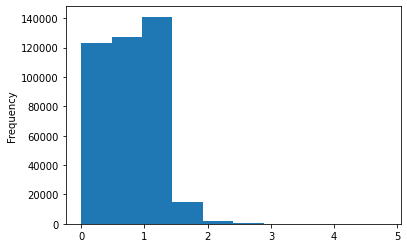

In [26]:
np.log(df.bedrooms).plot.hist()

In [27]:
df['logbed']=np.log(df.bedrooms)

In [28]:
# np.log(df.bathrooms).plot.hist()

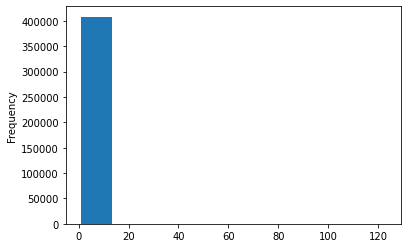

In [29]:
df.bedrooms.plot.hist()

In [30]:
df['logbath']=np.log(df.bathrooms)

In [31]:
df.shape

(408317, 24)

In [32]:
df.surface_covered.max()

11111111.0

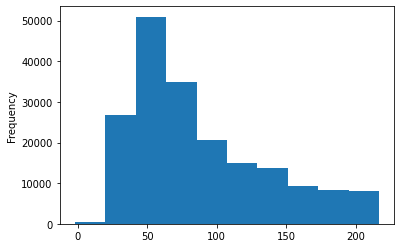

In [33]:
df.surface_covered[df.surface_covered.between(df.surface_covered.quantile(.0), df.surface_covered.quantile(.85))].plot.hist()

Limpio algunos outliers de superficie cubierta.

In [34]:
df.surface_covered.value_counts();

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


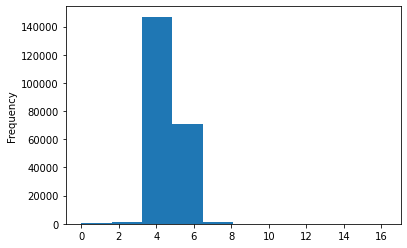

In [35]:
np.log(df.surface_covered).plot.hist()

In [36]:
df['logsupcov']=np.log(df.surface_covered)

/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [37]:
df.shape

(408317, 25)

In [38]:
# df=df[df.surface_covered<df.surface_covered.quantile(.9999)]
# df.surface_covered.plot.hist()

# df.shape (405996, 24) de original (834056, 24)


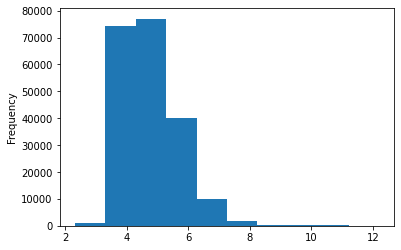

In [39]:
np.log(df.surface_total).plot.hist()

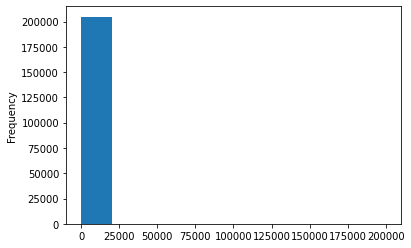

In [40]:
df.surface_total.plot.hist()

In [41]:
df['logsuptot']=np.log(df.surface_total)

In [42]:
df.l2.unique()

array(['Capital Federal', 'Bs.As. G.B.A. Zona Norte', 'Santa Fe',
       'Bs.As. G.B.A. Zona Oeste', 'Bs.As. G.B.A. Zona Sur', 'Córdoba',
       'Mendoza', 'Montevideo', 'Buenos Aires Interior', 'Misiones',
       'Maldonado', 'Buenos Aires Costa Atlántica', 'Entre Ríos',
       'Río Negro', 'Neuquén', 'Tucumán', 'San Luis', 'Chubut', 'Colonia',
       'Tierra Del Fuego', 'Salta', 'La Pampa', 'Florida', 'Jujuy',
       'Michigan', 'San Juan', 'Chaco', 'Rocha', 'Catamarca',
       'Santa Cruz', 'La Rioja', 'Pennsylvania', 'Santa Catarina',
       'Maryland', 'Santiago Del Estero', 'Corrientes', 'Rio de Janeiro',
       'São Paulo', 'Formosa'], dtype=object)

In [43]:
df.l3.value_counts()

Mar del Plata       25470
Rosario             23614
Tigre               22759
Palermo             18880
Lomas de Zamora     18723
                    ...  
Macachín                1
Dos de Mayo             1
Falda del Carmen        1
Llambi Campbell         1
Barranqueras            1
Name: l3, Length: 685, dtype: int64

In [44]:
df.property_type.unique()

array(['PH', 'Casa', 'Lote', 'Otro', 'Departamento', 'Local comercial',
       'Cochera', 'Oficina', 'Casa de campo', 'Depósito'], dtype=object)

# Tratamiento de los datos

In [45]:
df.columns

Index(['start_date', 'end_date', 'created_on', 'lat', 'lon', 'l1', 'l2', 'l3',
       'l4', 'l5', 'rooms', 'bedrooms', 'bathrooms', 'surface_total',
       'surface_covered', 'price', 'currency', 'title', 'description',
       'property_type', 'operation_type', 'logr', 'logbed', 'logbath',
       'logsupcov', 'logsuptot'],
      dtype='object')

In [46]:
# columns=['lat', 'lon', 'l1', 'l2', 'l3',
#        'property_type', 'operation_type', 'logr', 'logbed', 'logbath',
#        'logsupcov', 'logsuptot']

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 408317 entries, viJ4KF92mAwqb4VgSO8cxQ== to rEynGyGrrsxNeG0ib5vUBA==
Data columns (total 26 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   start_date       408317 non-null  datetime64[ns]
 1   end_date         408317 non-null  datetime64[ns]
 2   created_on       408317 non-null  datetime64[ns]
 3   lat              408317 non-null  float64       
 4   lon              408317 non-null  float64       
 5   l1               408317 non-null  object        
 6   l2               408317 non-null  object        
 7   l3               408317 non-null  object        
 8   l4               132732 non-null  object        
 9   l5               3185 non-null    object        
 10  rooms            363170 non-null  float64       
 11  bedrooms         408317 non-null  float64       
 12  bathrooms        394690 non-null  float64       
 13  surface_total    204972 non-null  floa

# Modelización

Primero volvemos a separar

In [48]:
from sklearn.model_selection import train_test_split
# Separate target from predictors
numerical_cols=['rooms', 'bedrooms', 'bathrooms',
       'surface_total', 'surface_covered']
categorical_cols=['l2','l3','property_type']
my_cols = categorical_cols + numerical_cols
y = df.price
X = df[my_cols]
# X = df.drop(['price'], axis=1)

# Divide data into training and validation subsets
X_train_full, X_valid_full, y_train, y_valid = train_test_split(X, y, train_size=0.8, test_size=0.2,random_state=42)


                                                                

X_train = X_train_full[my_cols].copy()
X_valid = X_valid_full[my_cols].copy()

In [49]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Preprocessing for numerical data
numerical_transformer = SimpleImputer(strategy='constant')

# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Bundle preprocessing for numerical and categorical data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

In [50]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100,max_depth=7, random_state=42, n_jobs=-1)


In [51]:
df.shape

(408317, 26)

In [52]:
from sklearn.metrics import mean_absolute_error
# Bundle preprocessing and modeling code in a pipeline
my_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)
                             ])

# # Preprocessing of training data, fit model 
my_pipeline.fit(X_train, y_train)

# # Preprocessing of validation data, get predictions
preds = my_pipeline.predict(X_valid)

# Evaluate the model
score = sk.model_selection.cross_val_score(my_pipeline, X_train, y=y_train, cv=5, scoring='neg_root_mean_squared_error',error_score='raise')
# score = mean_absolute_error(y_valid, preds)

print('Score:', score)

Score: [-315678.78051444 -267221.09565355 -257656.5306755  -265166.14331039
 -317060.35706682]


## Predicción para Kaggle


In [53]:
df_pred = pd.read_csv('/content/drive/MyDrive/a_predecir.csv', index_col="id")
df_pred.fillna(0, inplace=True)

In [54]:
# quedate con las mismas columnas que ar_properties
X_pred = df_pred[X.columns]

In [56]:
# los mejores hiperparámetros encontrados antes
n_estimators = 100
max_depth = 7

# entrenamiento
# reg = sk.ensemble.RandomForestRegressor(n_estimators=n_estimators, max_depth=max_depth, random_state=42, n_jobs=-1)
my_pipeline.fit(X, y)

# predicción
df_pred["price"] = my_pipeline.predict(X_pred)

In [57]:
# grabo la solución
df_pred[["price"]].to_csv("solucion.csv")